In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np


Unsupervised Learning:

Clustering is an unsupervised learning technique, meaning it works on data where labels (y) are not available.
The goal is to find patterns or groups (clusters) in the data based only on the input features (X).
No Target Variable:

Since clustering doesn't rely on predefined labels or targets, it focuses on the similarities between data points in the feature space (X) to form clusters.
Objective of Clustering:

Group similar data points together based on a distance metric (e.g., Euclidean distance).
The clustering algorithm tries to minimize intra-cluster variance and maximize inter-cluster variance.


Example:
Suppose you have a dataset of customers with features like age, income, and spending_score. The goal is to segment customers into groups for marketing purposes.

Input for Clustering:
Only the features (X):

python
Copy code
age   income   spending_score
25    50000    80
45    60000    50
...
Output:
Clusters (e.g., Group 1, Group 2, etc.) without requiring predefined labels.

In [3]:
X,y = make_blobs(n_samples=1000, centers=3 ,n_features=2,random_state=23)

In [4]:
X.shape

(1000, 2)

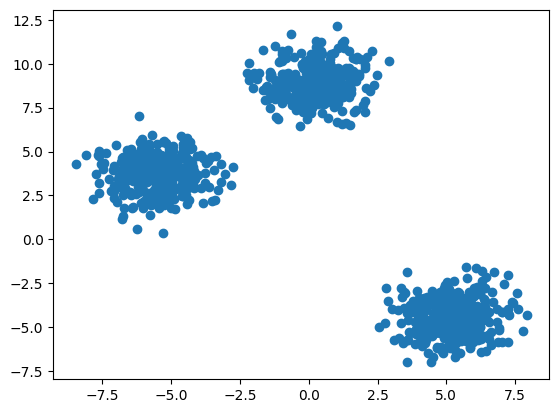

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

finding k values

In [7]:
from sklearn.cluster import KMeans

manual process
elbow method to select k vals

wcss measures the dist btwn each data point and centriod of clsuter

In [8]:
wcss=[]
for k in range (1,11):
    Kmeans=KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(X_train)
    wcss.append(Kmeans.inertia_)

In [9]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585607,
 1170.7704889937297,
 992.0624178531958,
 893.0653377167255,
 762.1878718065392,
 699.0448760922275,
 636.691504646931,
 557.2899741273089]

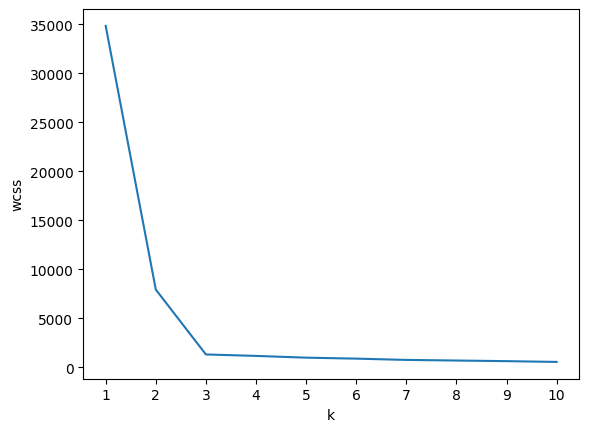

In [10]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [11]:
Kmeans=KMeans(n_clusters=3,init='k-means++') 

In [12]:
y_labels=Kmeans.fit_predict(X_train) 

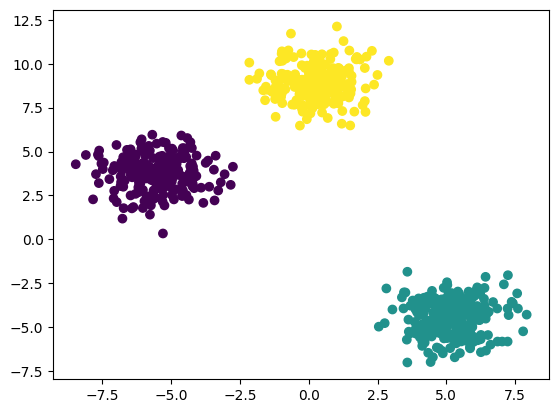

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [14]:
y_testlabels=Kmeans.fit_predict(X_test) 
y_testlabels

array([2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2,
       2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2,

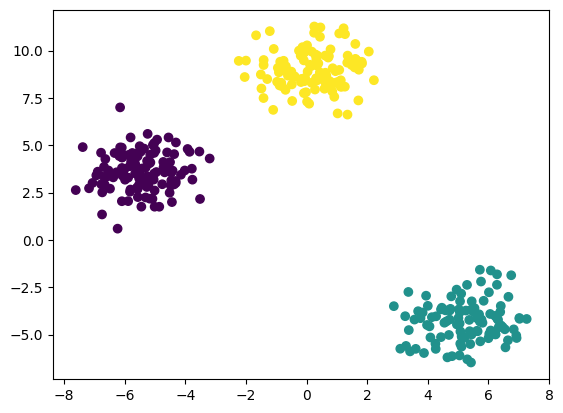

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_testlabels)

knee locator to automate the process or in large dataset find the k val
if inc val then concave warna convex
pip install kneed 

In [16]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

performace score
use silhouetee_score

In [17]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    Kmeans=KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(X_train)
    score=silhouette_score(X_train,Kmeans.labels_)
    silhouette_coefficients.append(score)

In [18]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6291669327337057,
 0.4763485724139249,
 0.3357985326210192,
 0.3383936534393026,
 0.3349502941597896,
 0.3344642000821309,
 0.3273988337157866]

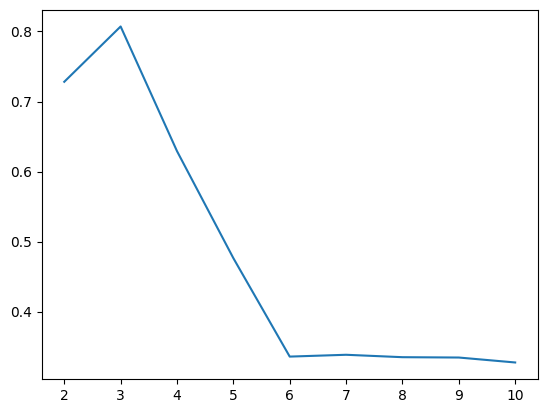

In [19]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.show()

using range 2,11 because if use 1 then all all point belongs to same clsuter which make no sense to calc silhouette score